# Example A

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import numpy as np
import pandas
from matplotlib import pyplot as plt
import pynocular as pn

## PointData
This class is to hold point-like data, that can consist for example of several arrays with equal length. Or it could be a pandas dataframe object. A point is characterized by the entries at a given index of all arrays, or a row in a dataframe. Also numpy structured arrays are supported, but columns cannot be added easilty.
The important thing to keep in mind is that every column or array must have a name.

We will generate some random data to demonstrate the functionality

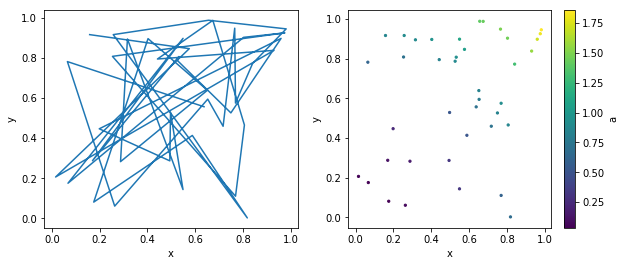

In [2]:
points = pn.PointData()
points['x'] = np.random.rand(40)
points['y'] = np.random.rand(40)
points['a'] = points['x']**2 + points['y']**2

fig, (ax1, ax2) = plt.subplots(figsize=(10,4), ncols=2)
points.plot('x', 'y', ax=ax1)
points.plot_scatter('x', 'y', c='a', s=5, cbar=True, ax=ax2)

In [3]:
points

x,0.158,0.575,0.0154,0.93,0.442,0.674,...,0.766,0.717,0.653,0.263,0.0648,0.637
y,0.916,0.847,0.206,0.838,0.795,0.988,...,0.949,0.459,0.594,0.0605,0.782,0.557
a,0.865,1.05,0.0427,1.57,0.827,1.43,...,1.49,0.725,0.779,0.0728,0.616,0.716


## GridData
In contrast to PointData, the GridData consists out of some dimensions of the data defined as a grid, and other variables as values at every grid-point. The grid dimensions can be points as well, or for example for histograms it can be defined over the bin's edges.
The class Grid allows to define all such dimesnions. Here we will create a regular grid for the variables `x` and `y`. Note that these variables have the same name as in the point arrray, which is important later when we will translate from one representation to another!

In [4]:
g = pn.GridData(x=10, y=5)

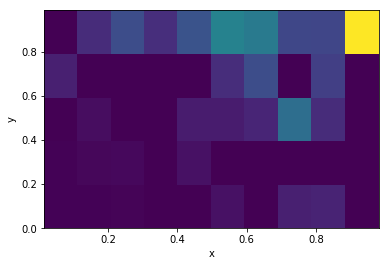

In [5]:
points.histogram(g).plot('a')

## Translations
So far in the GridData objects, we only specified the grid in `x` and `y`. Now we want to translate the variable `a` from the pointdata onto the grids. Several different methods are available for doing so. The following shows a few

In [7]:
g['a1'] = points.interp(g, method='nearest')['a']
g['a2'] = points.binwise(g, function='mean')['a']
g['a3'] = points.interp(g,  method='linear')['a']

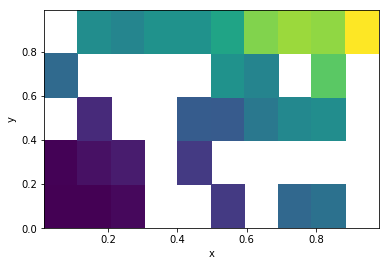

In [8]:
g.plot('a2')

In [9]:
np.vstack([np.arange(12), np.arange(12)])[np.newaxis]

array([[[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11],
        [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]]])

In [10]:
np.stack([np.arange(12), np.arange(12)])[0]

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [11]:
g.lookup(points)

x,0.158,0.575,0.0154,0.93,0.442,0.674,...,0.766,0.717,0.653,0.263,0.0648,0.637
y,0.916,0.847,0.206,0.838,0.795,0.988,...,0.949,0.459,0.594,0.0605,0.782,0.557
a1,0.865,1.11,0.0427,1.73,0.966,1.05,...,1.46,0.838,0.832,0.0728,0.616,0.716
a2,0.865,1.03,0.0427,1.74,0.896,1.42,...,1.49,0.828,0.806,0.0728,0.616,0.716
a3,0.822,1.09,0.123,1.66,0.999,1.22,...,1.35,0.794,0.904,0.0838,0.525,0.665


In [12]:
points.interp(points[['x']])

x,0.158,0.575,0.0154,0.93,0.442,0.674,...,0.766,0.717,0.653,0.263,0.0648,0.637
y,0.916,0.847,0.206,0.838,0.795,0.988,...,0.949,0.459,0.594,0.0605,0.782,0.557
a,0.865,1.05,0.0427,1.57,0.827,1.43,...,1.49,0.725,0.779,0.0728,0.616,0.716


In [13]:
points['a'][~np.isfinite(points['a'])]

In [14]:
isinstance(points, pn.PointData)

True

In [15]:
range(2,3)

range(2, 3)

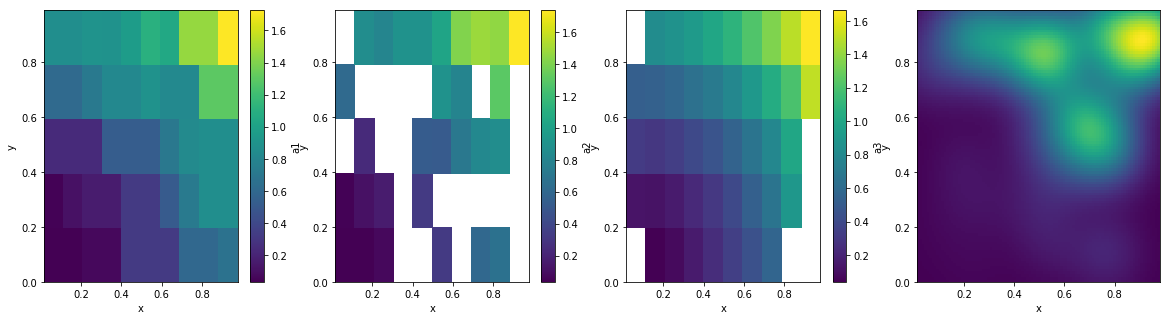

In [16]:
fig, ax = plt.subplots(1, 4, figsize=(20,5))

g.plot('a1', ax=ax[0], cbar=True)
g.plot('a2', ax=ax[1], cbar=True)
g.plot('a3', ax=ax[2], cbar=True)
points.kde(x=100, y=100, bw=0.1).plot('a', ax=ax[3])


# Numpy ufuncs
Numpy universal functions (ufuncs) are mostly supported on the grid

In [17]:
np.sum(g['a1'])

32.815543166334024

In [18]:
np.sum(g['a1'], axis='x')

y,[0.002 0.199],[0.199 0.396],[0.396 0.594],[0.594 0.791],[0.791 0.988]
,3.06,4.1,5.58,8.77,11.3


In [19]:
np.mean(g['a1'], axis='y') + np.std(g['a1'], axis='y')

x,[0.015 0.112],[0.112 0.209],[0.209 0.305],[0.305 0.402],[0.402 0.498],[0.498 0.595],[0.595 0.691],[0.691 0.788],[0.788 0.885],[0.885 0.981]
,0.688,0.69,0.749,0.834,0.855,0.951,0.937,1.19,1.33,1.47


In [20]:
g['a1'][np.isfinite(g['a2'])]

y \ x,[0.015 0.112],[0.112 0.209],[0.209 0.305],[0.305 0.402],[0.402 0.498],[0.498 0.595],[0.595 0.691],[0.691 0.788],[0.788 0.885],[0.885 0.981]
[0.002 0.199],0.0351,0.0372,0.0728,--,--,0.322,--,0.603,0.603,--
[0.199 0.396],0.0427,0.111,0.162,--,0.326,--,--,--,--,--
[0.396 0.594],--,0.239,--,--,0.526,0.526,0.716,0.838,0.866,--
[0.594 0.791],0.616,--,--,--,--,0.896,0.832,--,1.3,--
[0.791 0.988],--,0.865,0.906,0.901,0.966,1.11,1.05,1.46,1.46,1.73


In [21]:
np.sqrt(g)

y \ x,[0.015 0.112],[0.112 0.209],[0.209 0.305],[0.305 0.402],[0.402 0.498],[0.498 0.595],[0.595 0.691],[0.691 0.788],[0.788 0.885],[0.885 0.981]
[0.002 0.199],a1 = 0.187a2 = 0.187a3 = nan,a1 = 0.193a2 = 0.193a3 = 0.198,a1 = 0.27a2 = 0.27a3 = 0.289,a1 = 0.27a2 = nana3 = 0.395,a1 = 0.567a2 = nana3 = 0.493,a1 = 0.567a2 = 0.567a3 = 0.584,a1 = 0.567a2 = nana3 = 0.666,a1 = 0.777a2 = 0.777a3 = 0.753,a1 = 0.777a2 = 0.818a3 = nan,a1 = 0.818a2 = nana3 = nan
[0.199 0.396],a1 = 0.207a2 = 0.207a3 = 0.351,a1 = 0.334a2 = 0.334a3 = 0.346,a1 = 0.403a2 = 0.403a3 = 0.399,a1 = 0.403a2 = nana3 = 0.475,a1 = 0.571a2 = 0.571a3 = 0.549,a1 = 0.571a2 = nana3 = 0.633,a1 = 0.719a2 = nana3 = 0.729,a1 = 0.851a2 = nana3 = 0.817,a1 = 0.931a2 = nana3 = 0.948,a1 = 0.931a2 = nana3 = nan
[0.396 0.594],a1 = 0.489a2 = nana3 = 0.569,a1 = 0.489a2 = 0.489a3 = 0.546,a1 = 0.489a2 = nana3 = 0.579,a1 = 0.725a2 = nana3 = 0.629,a1 = 0.725a2 = 0.725a3 = 0.681,a1 = 0.725a2 = 0.719a3 = 0.742,a1 = 0.846a2 = 0.846a3 = 0.815,a1 = 0.916a2 = 0.91a3 = 0.891,a1 = 0.931a2 = 0.931a3 = 1,a1 = 0.931a2 = nana3 = nan
[0.594 0.791],a1 = 0.785a2 = 0.785a3 = 0.724,a1 = 0.785a2 = nana3 = 0.733,a1 = 0.847a2 = nana3 = 0.76,a1 = 0.909a2 = nana3 = 0.798,a1 = 0.909a2 = nana3 = 0.838,a1 = 0.946a2 = 0.946a3 = 0.891,a1 = 0.912a2 = 0.898a3 = 0.951,a1 = 0.912a2 = nana3 = 1.02,a1 = 1.14a2 = 1.14a3 = 1.09,a1 = 1.14a2 = nana3 = 1.23
[0.791 0.988],a1 = 0.93a2 = nana3 = nan,a1 = 0.93a2 = 0.93a3 = 0.906,a1 = 0.952a2 = 0.901a3 = 0.927,a1 = 0.949a2 = 0.949a3 = 0.959,a1 = 0.983a2 = 0.947a3 = 1,a1 = 1.05a2 = 1.01a3 = 1.04,a1 = 1.02a2 = 1.19a3 = 1.1,a1 = 1.21a2 = 1.22a3 = 1.16,a1 = 1.21a2 = 1.21a3 = 1.22,a1 = 1.31a2 = 1.32a3 = 1.29


In [22]:
np.sum(g, axis='x')

y,[0.002 0.199],[0.199 0.396],[0.396 0.594],[0.594 0.791],[0.791 0.988]
a1,3.06,4.1,5.58,8.77,11.3
a2,nan,nan,nan,nan,nan
a3,nan,nan,nan,8.42,nan


In [23]:
np.sqrt(g[np.isfinite(g['a2'])])

y \ x,[0.015 0.112],[0.112 0.209],[0.209 0.305],[0.305 0.402],[0.402 0.498],[0.498 0.595],[0.595 0.691],[0.691 0.788],[0.788 0.885],[0.885 0.981]
[0.002 0.199],a1 = 0.187a2 = 0.187a3 = nan,a1 = 0.193a2 = 0.193a3 = 0.198,a1 = 0.27a2 = 0.27a3 = 0.289,a1 = --a2 = --a3 = --,a1 = --a2 = --a3 = --,a1 = 0.567a2 = 0.567a3 = 0.584,a1 = --a2 = --a3 = --,a1 = 0.777a2 = 0.777a3 = 0.753,a1 = 0.777a2 = 0.818a3 = nan,a1 = --a2 = --a3 = --
[0.199 0.396],a1 = 0.207a2 = 0.207a3 = 0.351,a1 = 0.334a2 = 0.334a3 = 0.346,a1 = 0.403a2 = 0.403a3 = 0.399,a1 = --a2 = --a3 = --,a1 = 0.571a2 = 0.571a3 = 0.549,a1 = --a2 = --a3 = --,a1 = --a2 = --a3 = --,a1 = --a2 = --a3 = --,a1 = --a2 = --a3 = --,a1 = --a2 = --a3 = --
[0.396 0.594],a1 = --a2 = --a3 = --,a1 = 0.489a2 = 0.489a3 = 0.546,a1 = --a2 = --a3 = --,a1 = --a2 = --a3 = --,a1 = 0.725a2 = 0.725a3 = 0.681,a1 = 0.725a2 = 0.719a3 = 0.742,a1 = 0.846a2 = 0.846a3 = 0.815,a1 = 0.916a2 = 0.91a3 = 0.891,a1 = 0.931a2 = 0.931a3 = 1,a1 = --a2 = --a3 = --
[0.594 0.791],a1 = 0.785a2 = 0.785a3 = 0.724,a1 = --a2 = --a3 = --,a1 = --a2 = --a3 = --,a1 = --a2 = --a3 = --,a1 = --a2 = --a3 = --,a1 = 0.946a2 = 0.946a3 = 0.891,a1 = 0.912a2 = 0.898a3 = 0.951,a1 = --a2 = --a3 = --,a1 = 1.14a2 = 1.14a3 = 1.09,a1 = --a2 = --a3 = --
[0.791 0.988],a1 = --a2 = --a3 = --,a1 = 0.93a2 = 0.93a3 = 0.906,a1 = 0.952a2 = 0.901a3 = 0.927,a1 = 0.949a2 = 0.949a3 = 0.959,a1 = 0.983a2 = 0.947a3 = 1,a1 = 1.05a2 = 1.01a3 = 1.04,a1 = 1.02a2 = 1.19a3 = 1.1,a1 = 1.21a2 = 1.22a3 = 1.16,a1 = 1.21a2 = 1.21a3 = 1.22,a1 = 1.31a2 = 1.32a3 = 1.29


In [24]:
g[np.logical_and(g['a1'] > 0, g['a2'] < 1)]

y \ x,[0.015 0.112],[0.112 0.209],[0.209 0.305],[0.305 0.402],[0.402 0.498],[0.498 0.595],[0.595 0.691],[0.691 0.788],[0.788 0.885],[0.885 0.981]
[0.002 0.199],a1 = 0.0351a2 = 0.0351a3 = nan,a1 = 0.0372a2 = 0.0372a3 = 0.0394,a1 = 0.0728a2 = 0.0728a3 = 0.0838,a1 = --a2 = --a3 = --,a1 = --a2 = --a3 = --,a1 = 0.322a2 = 0.322a3 = 0.342,a1 = --a2 = --a3 = --,a1 = 0.603a2 = 0.603a3 = 0.566,a1 = 0.603a2 = 0.67a3 = nan,a1 = --a2 = --a3 = --
[0.199 0.396],a1 = 0.0427a2 = 0.0427a3 = 0.123,a1 = 0.111a2 = 0.111a3 = 0.119,a1 = 0.162a2 = 0.162a3 = 0.159,a1 = --a2 = --a3 = --,a1 = 0.326a2 = 0.326a3 = 0.301,a1 = --a2 = --a3 = --,a1 = --a2 = --a3 = --,a1 = --a2 = --a3 = --,a1 = --a2 = --a3 = --,a1 = --a2 = --a3 = --
[0.396 0.594],a1 = --a2 = --a3 = --,a1 = 0.239a2 = 0.239a3 = 0.298,a1 = --a2 = --a3 = --,a1 = --a2 = --a3 = --,a1 = 0.526a2 = 0.526a3 = 0.463,a1 = 0.526a2 = 0.517a3 = 0.55,a1 = 0.716a2 = 0.716a3 = 0.665,a1 = 0.838a2 = 0.828a3 = 0.794,a1 = 0.866a2 = 0.866a3 = 1,a1 = --a2 = --a3 = --
[0.594 0.791],a1 = 0.616a2 = 0.616a3 = 0.525,a1 = --a2 = --a3 = --,a1 = --a2 = --a3 = --,a1 = --a2 = --a3 = --,a1 = --a2 = --a3 = --,a1 = 0.896a2 = 0.896a3 = 0.793,a1 = 0.832a2 = 0.806a3 = 0.904,a1 = --a2 = --a3 = --,a1 = --a2 = --a3 = --,a1 = --a2 = --a3 = --
[0.791 0.988],a1 = --a2 = --a3 = --,a1 = 0.865a2 = 0.865a3 = 0.822,a1 = 0.906a2 = 0.811a3 = 0.86,a1 = 0.901a2 = 0.901a3 = 0.919,a1 = 0.966a2 = 0.896a3 = 0.999,a1 = --a2 = --a3 = --,a1 = --a2 = --a3 = --,a1 = --a2 = --a3 = --,a1 = --a2 = --a3 = --,a1 = --a2 = --a3 = --


In [24]:
'%.3g'%1.00

'1'

In [25]:
def fmt(f, precision=2):
    '''format with 
    
    '''
    if np.log10(f) < 0:
        return ('%.' + str(precision - 1) + 'e')%f
    else:
        return ('%.' + str(precision - 1) + 'f')%f

In [26]:
fmt(555,3)

'555.00'

In [27]:
def float_nsf(q,n):
    """
    Truncate a float to n significant figures.  May produce overflow in 
    very last decimal place when q < 1.  This can be removed by an extra 
    formatted print. 
    Arguments:
      q : a float
      n : desired number of significant figures
    Returns:
    Float with only n s.f. and trailing zeros, but with a possible small overflow.
    """
    sgn=np.sign(q)
    q=abs(q)
    n=int(np.log10(q/10.)) # Here you overwrite input n!
    if q<1. :
        val=q/(10**(n-1))
    else:
        val=q/(10**n)
    return sgn*int(val)*10.**n

In [28]:
float_nsf(55555,1)

55000.0

In [29]:
np.format_float_scientific(21)

'2.1e+01'